# Práctica 2: Limpieza y validación de los datos


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from scipy.stats import normaltest,f_oneway, shapiro, chi2_contingency
from scipy.stats import anderson
from scipy.stats import ttest_ind

## 1. Descripción del dataset.

Los problemas cardíacos pueden tener un gran impacto en la calidad de vida de las personas y pueden requerir tratamientos costosos y prolongados. Por lo tanto, es importante entender qué factores pueden aumentar el riesgo de problemas cardíacos y cómo se pueden prevenir o tratar.

Este dataset es interesante porque puede ser utilizado para entender mejor las características de las personas que tienen un mayor riesgo de sufrir una enfermedad cardíaca y para desarrollar estrategias para prevenir y tratar esta enfermedad. Los dataset como este son a menudo utilizados para entrenar modelos de machine learning que pueden predecir el riesgo de enfermedad cardíaca de una persona dado un conjunto de características de esa persona. Estos modelos pueden ser utilizados por profesionales de la salud para tomar decisiones sobre el tratamiento y la atención de los pacientes.

El dataset contiene los siguientes campos:
* age: edad de la persona.

* sex: genero de la persona.

* cp: tipo de dolor en el pecho.
    * 1 angina típica.
    * 2 angina atípica.
    * 3 dolor no anginoso
    * 4 asintomático.
    
* trtbps: presión arterial en reposo (en mm Hg).

* chol: colesterol en mg/dl obtenido a través del sensor BMI.

* fbs: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso).

* restecg: resultados electrocardiográficos en reposo.
    * 0 normal
    * 1 tener anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)
    * 2 mostrar hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes.

* thalachh: frecuencia cardíaca máxima alcanzada.

* exng: angina inducida por el ejercicio (1 = sí; 0 = no).

* oldpeak: pico anterior.

* slp: pendiente.

* caa: número de buques principales (0-3).
    * 0 = sin buques importantes
    * 1 = 1 buque principal
    * 2 = 2 vasos principales
    * 3 = 3 vasos principales

* thall: talasemia
    * 1 = defecto fijo
    * 2 = normales
    * 3 = defecto reversible

* output: 0 menos posibilidades de infarto y 1 más posibilidades de infarto.

La variable `output` es la variable objetivo, que indica si una persona tiene más o menos posibilidades de sufrir un infarto.

El dataset se encuentra disponible  [aquí](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

Los datos recopilados en este conjunto de datos pueden ser utilizados para responder a preguntas y problemas específicos, como:

* ¿Qué variables influyen más en el riesgo de padecer un infarto?
* ¿Cómo es la relación entre la edad y la posibilidad de infarto ?
* ¿Existe una relación entre el tipo de dolor en el pecho y la posibilidad de infarto en el dataset estudiado?
* ¿Existe una relación entre el nivel de colesterol y la presión arterial en reposo en el dataset estudiado?
* ¿Cómo afecta el nivel de colesterol en la presión arterial en reposo de una persona?


## 2. Integración y selección

Antes de comenzar con la limpieza de los datos, procedemos a realizar la lectura del archivo en formato CSV en el que se encuentran. Como se muestra a continuación:


In [2]:
heart = pd.read_csv('heart.csv')
heart.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Es importante tener en cuenta el tipo de variable de cada columna en un conjunto de datos, ya que puede afectar la forma en que los datos se manipulan y se analizan.

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Una vez cargados los datos en la variable `heart`, se observa que todas las variables son de tipo `int64`, menos la variable `oldpeak` que es de tipo `float64`. También, se visualiza que no existen valores nulos en el dataset.

In [4]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Al inspeccionar los valores de las variables, se observa que `caa` y `thall` son incorrectas. La variable `caa` solo debe tener valores de 0 a 3, pero el resultado muestra un total de 5, lo que significa que hay un valor adicional.

In [5]:
heart.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

La variable `thall` solo debe tener valores del 1 al 3, pero el resultado muestra un total de 4, lo que significa que hay un valor adicional, como se muestra a continuación:

In [6]:
heart.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

En la siguiente sección se corregirán los datos analizados.

## 3. Limpieza de datos

Lo primero que se realizará es remplazar los valores erróneos de las variables `caa` y `thall` a través de kNN-imputation. Para esto se reemplazarán los valores erróneos por valores nulos.

In [55]:
heart.loc[heart['caa'] == 4, 'caa'] = np.NaN
heart.loc[heart['thall'] == 0, 'thall'] = np.NaN
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         5
thall       2
output      0
dtype: int64

Luego, se utilizará la clase `KNNImputer` de scikit-learn para completar los valores faltantes de las variables `caa` y `thall`, como se muestra a continuación:

In [56]:
impKNN = KNNImputer(n_neighbors=5)
newvalues = impKNN.fit_transform(heart[['caa', 'thall']])

heartrecordimp = pd.DataFrame(newvalues, columns=['caa', 'thall'])

In [57]:
heart['caa'] = heartrecordimp['caa'].astype(int)
heart['thall'] = heartrecordimp['thall'].astype(int)
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Para tener una mejor interpretación en el análisis de datos, se reemplazará los valores categóricos numéricos por valores de caracteres, como se muestra a continuación:

In [8]:
df_heart = heart.copy()
df_heart['sex'] = heart.sex.replace({0: "Female", 1: "Male"})
df_heart['cp'] = heart.cp.replace({0: "Typical Angina", 
                          1: "Atypical Angina", 
                          2: "Non-Anginal Pain",
                          3: "Symptomatic"})
df_heart['fbs'] = heart.fbs.replace({0: "False", 1: "True"})
df_heart['restecg'] = heart.restecg.replace({0: "normal", 1: "ST-T Wave Abnormality", 2: "Left Ventricular Hypertrophy"})
df_heart['exng'] = heart.exng.replace({1: "Yes", 0: "No"})
df_heart['slp'] = heart.slp.replace({0: "Upsloping", 1: "Flat", 2:"Downsloping"})
df_heart['caa'] = heart.caa.replace({0: "0", 1: "1", 2: "2", 3: "3"})
df_heart['thall'] = heart.thall.replace({0: "Null", 1: "Fixed Defect", 2: "Reversible Defect", 3: "Normal"})
# df_heart['output'] = heart.output.replace({1: "Heart Disease", 0: "No Heart Disease"})

In [59]:
df_heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           4
thall         3
output        2
dtype: int64

In [60]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,Symptomatic,145,233,True,normal,150,No,2.3,Upsloping,0,Fixed Defect,Heart Disease
1,37,Male,Non-Anginal Pain,130,250,False,ST-T Wave Abnormality,187,No,3.5,Upsloping,0,Reversible Defect,Heart Disease
2,41,Female,Atypical Angina,130,204,False,normal,172,No,1.4,Downsloping,0,Reversible Defect,Heart Disease
3,56,Male,Atypical Angina,120,236,False,ST-T Wave Abnormality,178,No,0.8,Downsloping,0,Reversible Defect,Heart Disease
4,57,Female,Typical Angina,120,354,False,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,Reversible Defect,Heart Disease


### 3.1. Valores extremos

Los valores extremos o outliers son aquellos que parecen no ser congruentes sin los comparamos con el resto de los datos. Para identificarlos, se desarrolló una función llamada `detect_outliers` que se encuentran los valores a más de 1,5 veces la longitud del bigote por encima del tercer cuartil o a más de 1,5 veces la longitud del bigote por debajo del primer cuartil. Este método se utiliza en el diagrama de caja para identificar ourliers.

In [9]:
def detect_outliers(df, col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    
    print(f'{col}',outliers[col].values)

numeric_variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for col in numeric_variables:
    detect_outliers(df_heart, col)

age []
trtbps [172 178 180 180 200 174 192 178 180]
chol [417 564 394 407 409]
thalachh [71]
oldpeak [4.2 6.2 5.6 4.2 4.4]


No se encontraron valores extrenos en la edad. Sin embargo, los valores encontrados en la variables presión arterial en reposo, colesterol, frecuencia cardíaca máxima y pico anterior pueden ser valores que perfectamente pueden darse.

Es importante tener en cuenta que la detección de outliers es subjetiva y puede variar según el método utilizado y los criterios establecidos para determinar qué valores son considerados outliers.

## 4. Análisis de los datos

### Comprobación de la normalidad y homogeneidad de la varianza

Para la comprobación de que los valores que toman nuestras variables cuantitativas provienen de una población distribuida normalmente, utilizaremos la prueba de normalidad de Shapiro-Wilk.

Así, se comprueba que para que cada prueba se obtiene un p-valor superior al nivel de significación prefijado α = 0, 05. Si esto se cumple, entonces se considera que variable en cuestión sigue una distribución normal.

In [12]:
for field in numeric_variables:
    _, p_value = shapiro(df_heart[field])
    print('%s: %.10f' % (field, p_value))

age: 0.0058014095
trtbps: 0.0000014580
chol: 0.0000000054
thalachh: 0.0000662033
oldpeak: 0.0000000000


Como se ha comprobado, ninguna de las variables cuantitativas sigue una distribución normal.

 ### ¿Qué variables influyen más en el riesgo de padecer un infarto?
 
En primer lugar, procedemos a realizar un análisis de correlación entre las distintas variables para determinar cuáles de ellas ejercen una mayor influencia sobre el riesgo de padecer un infarto. Para ello, se utilizará el coeficiente de correlación de Spearman, puesto que hemos visto que tenemos datos que no siguen una distribución normal.

In [87]:
df_heart.corr()['output']

age         -0.225439
trtbps      -0.144931
chol        -0.085239
thalachh     0.421741
oldpeak     -0.430696
output       1.000000
age_bc      -0.221472
chol_bc     -0.093119
trtbps_bc   -0.140443
Name: output, dtype: float64

Así, identificamos cuáles son las variables más correlacionadas con el precio en función de su proximidad con los valores -1 y +1. Teniendo esto en cuenta, ninguna variable tiene una correlación significativa con la probabilidad de riesgo de padecer un infarto.

###  **¿Existe una diferencia estadísticamente significativa en la edad entre las personas con y sin infarto?**

La edad es un factor de riesgo conocido para el infarto, por lo que si se encuentra una diferencia significativa en la edad entre las personas con y sin infarto, se puede inferir que la edad es un factor importante en el desarrollo del infarto.

En este caso, utilizaremos un histograma para representar la distribución de las edades de las personas con infarto y sin infarto. En el eje `x` representan las edades y en el eje `y` representa el porcentaje de personas que caen dentro de ese rango.

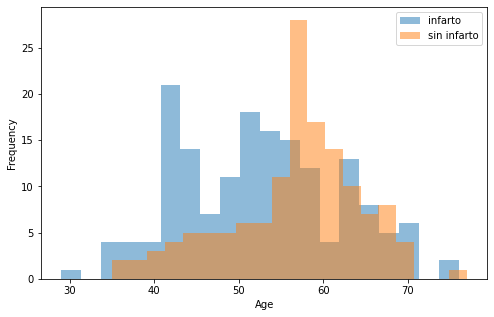

In [46]:
plt.figure(figsize=(8,5))
plt.hist(df_heart[df_heart['output'] == 1]['age'], bins=20, alpha=0.5, label='infarto')
plt.hist(df_heart[df_heart['output'] == 0]['age'], bins=20, alpha=0.5, label='sin infarto')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

En el histograma de personas con riesgo a infartos se observan tres picos en las edades de 40 a 45 años, de 50 a 55 años y de 60 a 65 años. Esto puede indicar que hay una mayor probabilidad de sufrir un infarto en esos rangos de edad.

Por otro lado, en el histograma de personas sin riesgos se observa un pico en las edades de 55 a 65 años. Esto puede indicar que hay una menor probabilidad de sufrir un infarto en esos rangos de edad.

Es importante tener en cuenta que las conclusiones deben ser contrastadas con otras variables y análisis estadísticos para poder determinar si realmente existe una relación entre la edad y el riesgo de infarto.

Por las razones anteriormente descritas, se realizará un test t de Student para determinar si hay una diferencia significativa entre las medias de la edad de personas con infarto y la edad de personas sin infarto.

Se debe destacar que un test paramétrico como el que a continuación se utiliza necesita que los datos sean normales, si la muestra es de tamaño inferior a 30. Como en nuestro caso, n > 30, el contraste de hipótesis siguiente es válido.

Tendremos dos muestras: la primera de ellas se corresponderá a las edades de las personas con riesgo de un informato y la otras las edades de las personas sin riesgos de un infarto.

In [42]:
infarto = df_heart[df_heart['output'] == 1]
sin_infarto = df_heart[df_heart['output'] == 0]

Así, se plantea el siguiente contraste de hipótesis de dos muestras sobre la diferencia de medias. La formulación de la hipótesis alternativa es la siguiente:

$$
H_0: \mu_1 = \mu_2 \\
H_A: \mu_1 \neq \mu_2
$$

donde $\mu_1$ es la media de las edades de la primera muestra y $\mu_2$ es la media de las edades de la segunda muestra. Así, tomaremos α = 0.05.

In [43]:
# Seleccionar las edades de las personas con infarto
edad_con_infarto = infarto["age"]

# Seleccionar las edades de las personas sin infarto
edad_sin_infarto = sin_infarto["age"]

# Realizar el test de t de Student
t, p = ttest_ind(edad_con_infarto, edad_sin_infarto)

print("El valor del test t es:", t)
print("El valor p es:", p)
if p < 0.05:
    print("Hay diferencias estadísticamente significativas en la edad entre las personas con y sin infarto")
else:
    print("No hay diferencias estadísticamente significativas en la edad entre las personas con y sin infarto")

El valor del test t es: -4.014560975148874
El valor p es: 7.524801303442373e-05
Hay diferencias estadísticamente significativas en la edad entre las personas con y sin infarto


Se ha rechazado la hipótesis nula y se ha concluido que existe una diferencia estadísticamente significativa en la edad entre las personas con y sin infarto en este dataset. Esto quiere decir que la variable `age` es un factor relevante en la relación con la posibilidad de infarto en el dataset estudiado.

### ¿Existe una relación entre el tipo de dolor en el pecho y la posibilidad de infarto en este dataset?

Estudiar la relación entre el tipo de dolor en el pecho y la posibilidad de infarto es importante ya que permitirá identificación temprana de pacientes en riesgo. Identificar pacientes con algún dolor en el pecho puede permitir a los médicos intervenir tempranamente y prevenir o tratar el infarto antes de que ocurra.

Utilizaremos un gráfico de barras para estudiar la relación entre el tipo de dolor en el pecho y la posibilidad de infarto. En el eje `x` se muestran los tipos de dolor en el pecho, en el eje `y` la proporción de pacientes con infarto.


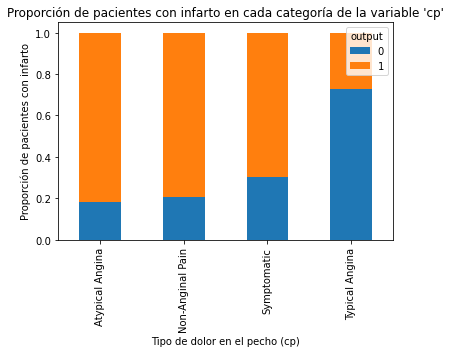

In [51]:
cp_table = pd.crosstab(df_heart["cp"], df_heart["output"])

prop = cp_table.div(cp_table.sum(1), axis=0)
prop.plot(kind="bar", stacked=True)
plt.title("Proporción de pacientes con infarto en cada categoría de la variable 'cp'")
plt.xlabel("Tipo de dolor en el pecho (cp)")
plt.ylabel("Proporción de pacientes con infarto")
plt.show()

Se observa que existe una mayor proporción de pacientes con riesgo de infarto en las categorías de "angina atípica" y "dolor no anginoso" en comparación con las demás categorías. Esto indica que los pacientes con dolores de tipo angina atípica y dolor no anginoso tienen un mayor riesgo de infarto en comparación con los pacientes con dolores de otros tipos. Esto podría ser un indicador importante para la detección temprana y el tratamiento de pacientes con riesgo de infarto.

El test chi-cuadrado se utiliza para determinar si hay una diferencia significativa entre variables categóricas. Por esta razón,  se va a utilizar el test chi-cuadrado para determinar si hay una diferencia significativa en la distribución de pacientes con infarto entre las diferentes categorías de la variable `cp`.

In [55]:
cp_table = pd.crosstab(df_heart["cp"], df_heart["output"])

# Realizar el test chi-cuadrado de independencia
chi2, p, dof, expected = chi2_contingency(cp_table)

print("El valor p es:", p)
if p < 0.05:
    print("Existe una relación estadísticamente significativa entre la variable 'cp' y la variable 'output'.")
else:
    print("No existe una relación estadísticamente significativa entre la variable 'cp' y la variable 'output'.")

El valor p es: 1.3343043373050064e-17
Existe una relación estadísticamente significativa entre la variable 'cp' y la variable 'output'.


En este caso, el valor p de 1.3343043373050064e-17 es extremadamente pequeño, lo que sugiere que es altamente improbable que los resultados observados en la relación entre el tipo de dolor en el pecho y la posibilidad de infarto se deban al azar. Por lo tanto, se puede concluir que existe una relación estadísticamente significativa entre el tipo de dolor en el pecho y la posibilidad de infarto en este dataset.

### Comparar la presión arterial en reposo entre individuos con diferentes niveles de colesterol

La presión arterial en reposo es un factor importante en la prevención y el tratamiento de la enfermedad cardiovascular, por lo que conocer si existen diferencias en este indicador entre individuos con diferentes niveles de colesterol puede ser útil para mejorar la atención médica y la prevención de enfermedades cardiovasculares.

Según la American Heart Association (AHA), los niveles de colesterol se clasifican de la siguiente manera:

* Colesterol total deseable: menor de 200 mg/dL
* Nivel alto: 200-239 mg/dL
* Nivel muy alto: 240 mg/dL o más


Para explorar los datos se utilizará el gráfico de cajas. Este tipo de gráfico permitirá visualizar la distribución de los datos de presión arterial en reposo para cada grupo de niveles de colesterol y comparar fácilmente las medias y los rangos de los datos entre los grupos. En el eje `x` se mostrará los datos de colesterol alto y bajo, y en el eje `y` los niveles de la precisión arterial.

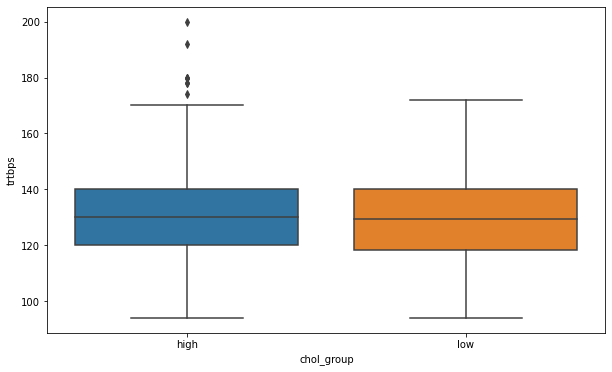

In [63]:
df_heart["chol_group"] = np.where(df_heart["chol"] < 200, "low", "high")

plt.figure(figsize=(10,6))
sns.boxplot(x="chol_group", y="trtbps", data=df_heart)
plt.show()

Las medias de presión arterial en reposo entre individuos con niveles bajos y altos de colesterol parecen ser iguales, es probable que no exista una diferencia estadísticamente significativa entre los grupos.

Para esta prueba se separan en dos dataset. Uno con el colesterol bajo menor a 200 mg/dL y otro con el colesterol alto mayor o igual a 200 mg/dL.

In [28]:
low_chol = df_heart[df_heart['chol'] < 200]
high_chol = df_heart[df_heart['chol'] >= 200]

Así, se plantea el siguiente contraste de hipótesis de dos muestras sobre la diferencia de medias. La formulación de la hipótesis alternativa es la siguiente:

$$
H_0: \mu_1 = \mu_2 \\
H_A: \mu_1 \neq \mu_2
$$

En las siguientes sentencias se utilizará la función `ttest_ind` de la librería scipy.stats. Se está pasando como argumentos los dos grupos de datos la presión arterial en reposo de las personas con colesterol bajo y alto.

In [40]:
f_val, p_val = ttest_ind(high_chol['trtbps_bc'], low_chol['trtbps_bc'])

print("El valor de F es:", f_val)
print("El valor p es:", p_val)

El valor de F es: 1.3583109790303207
El valor p es: 0.17538219823179257


El p-value de 0.175 es mayor que el nivel de significancia establecido (0.05) por lo que se acepta la hipótesis nula. Se puede decir que no hay diferencias significativas entre los valores de la presión arterial en reposo en los individuos con diferentes niveles de colesterol. No hay evidencia suficiente para afirmar que exista una relación entre el nivel de colesterol y la presión arterial en reposo. No se puede afirmar que un nivel alto o bajo de colesterol tenga un efecto significativo en la presión arterial en reposo de una persona.

## 4. Conclusiones

En resumen, el estudio del dataset sugiere que la edad es un factor relevante en la relación con la posibilidad de infarto, mientras que no se encontró una correlación significativa entre las demás variables y la probabilidad de riesgo de padecer un infarto. Sin embargo, se ha encontrado una relación estadísticamente significativa entre el tipo de dolor en el pecho y la posibilidad de infarto en el dataset. Además, no hay evidencia suficiente para afirmar que exista una relación entre el nivel de colesterol y la presión arterial en reposo.